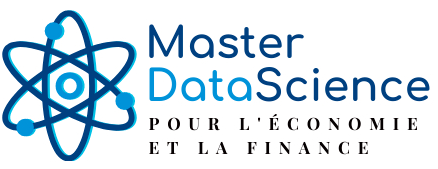

**EL KHLIFI Imad**

Module :  Deep Learning

Supervised by : Dr. Hammadi Nait-Charif

## Import Packages


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from keras.optimizers import Adam , Nadam, Adadelta, Adamax
from keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from keras import backend as K  # Import Keras backend

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [18]:
dataraw = pd.read_csv('/content/monthly_csv.csv',index_col='Date', parse_dates=['Date'])
dataraw

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292
...,...,...
1880-03-06,GISTEMP,-0.1800
1880-02-06,GCAG,-0.1229
1880-02-06,GISTEMP,-0.2100


##  Filter data for each source



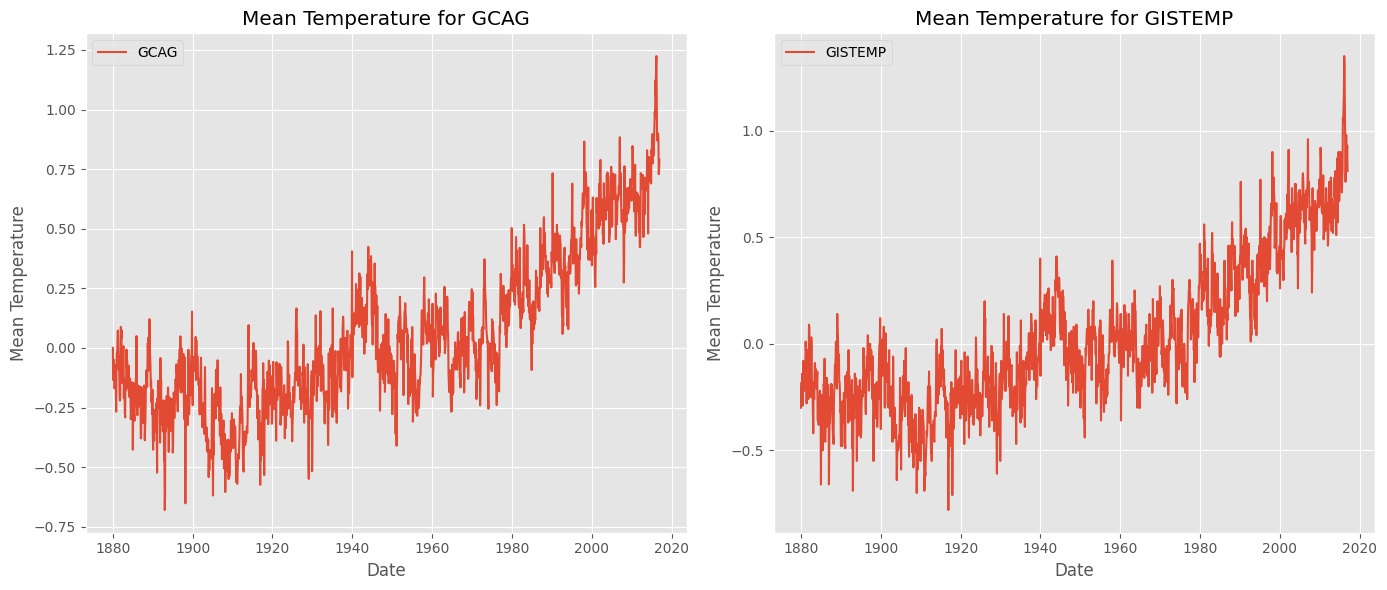

In [19]:
source = 'Source'
mean = 'Mean'
# Filter data for each source
gcag_data = dataraw[dataraw[source] == 'GCAG']
gistemp_data = dataraw[dataraw[source] == 'GISTEMP']

# Plotting
plt.figure(figsize=(14, 6))

# Plot for GCAG
plt.subplot(1, 2, 1)
plt.plot(gcag_data.index, gcag_data[mean], label='GCAG')
plt.title('Mean Temperature for GCAG')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Plot for GISTEMP
plt.subplot(1, 2, 2)
plt.plot(gistemp_data.index, gistemp_data[mean], label='GISTEMP')
plt.title('Mean Temperature for GISTEMP')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('28.pdf', dpi=300)
plt.show()

In [20]:
gcag_data.describe()

,Mean
count,1644.000000
mean,0.048797
std,0.326230
min,-0.679600
25%,-0.190625
50%,-0.021650
75%,0.252150
max,1.224500


In [21]:
gistemp_data.describe()

,Mean
count,1644.000000
mean,0.024380
std,0.343709
min,-0.780000
25%,-0.230000
50%,-0.050000
75%,0.230000
max,1.350000


# Feature Selection

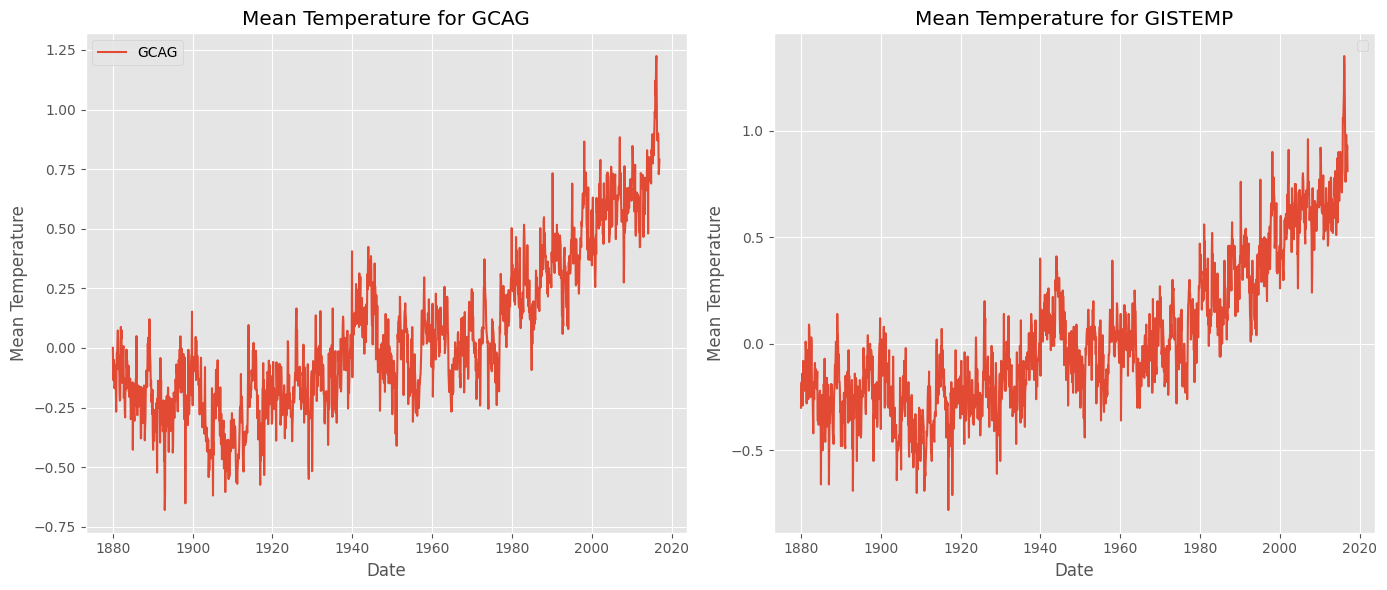

In [22]:
dataset_gcag = pd.DataFrame(gcag_data['Mean'])
dataset_gistemp = pd.DataFrame(gistemp_data['Mean'])

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for GCAG
axes[0].plot(gcag_data.index, gcag_data[mean], label='GCAG')
axes[0].set_title('Mean Temperature for GCAG')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean Temperature')
axes[0].legend()
axes[0].grid(True)

# Plot for GISTEMP
axes[1].plot(gistemp_data.index, gistemp_data[mean])
axes[1].set_title('Mean Temperature for GISTEMP')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Mean Temperature')
axes[1].legend()
axes[1].grid(True)


# Adjust layout
plt.tight_layout()
plt.savefig('29.pdf', dpi=300)
plt.show()

# Preprocessing Data

## Normalization Min-Max

In [23]:
#Min-Max Normalization
dataset_norm_gcag = dataset_gcag.copy()
dataset_gcag[['Mean']]
scaler = MinMaxScaler()
dataset_norm_gcag['Mean'] = scaler.fit_transform(dataset_gcag[['Mean']])
dataset_norm_gcag

,Mean
Date,
2016-12-06,0.771546
2016-11-06,0.751011
2016-10-06,0.739877
2016-09-06,0.817342
2016-08-06,0.829473
...,...
1880-05-06,0.318156
1880-04-06,0.330707
1880-03-06,0.285647


In [24]:
#Min-Max Normalization
dataset_norm_gistemp = dataset_gistemp.copy()
dataset_gistemp[['Mean']]
scaler = MinMaxScaler()
dataset_norm_gistemp['Mean'] = scaler.fit_transform(dataset_gistemp[['Mean']])
dataset_norm_gistemp

,Mean
Date,
2016-12-06,0.746479
2016-11-06,0.802817
2016-10-06,0.784038
2016-09-06,0.774648
2016-08-06,0.826291
...,...
1880-05-06,0.300469
1880-04-06,0.239437
1880-03-06,0.281690


## Graph Data Normalized

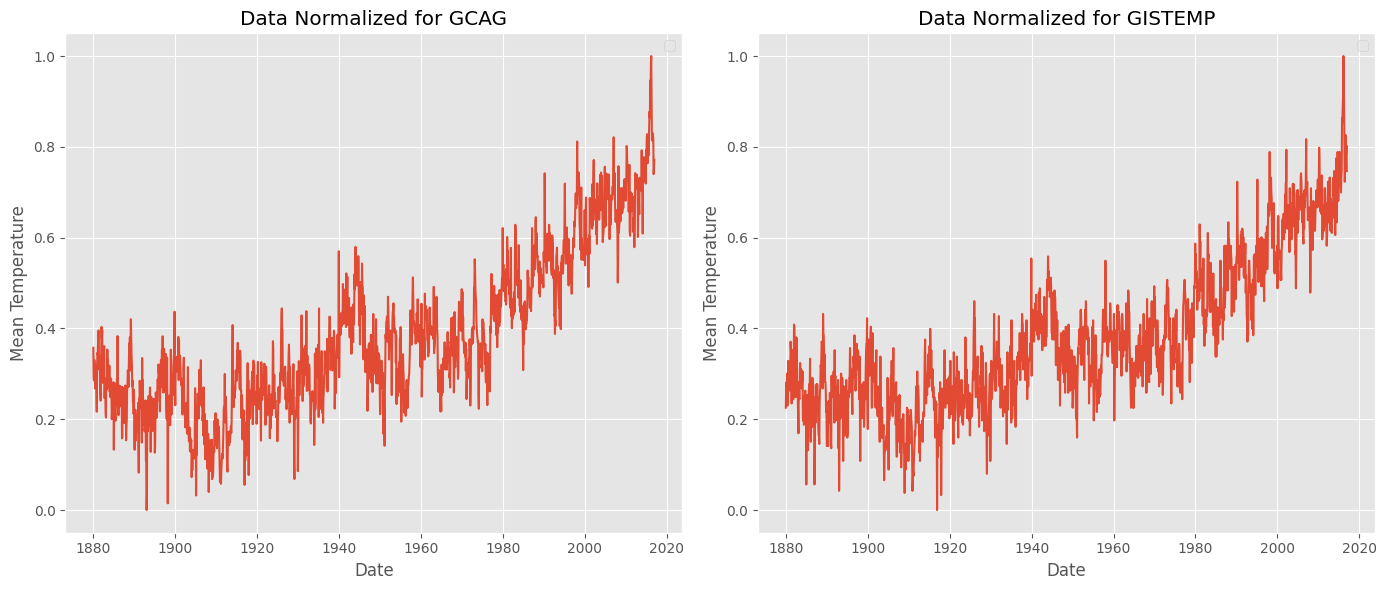

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(dataset_norm_gcag)
plt.title('Data Normalized for GCAG')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Plot for GISTEMP
plt.subplot(1, 2, 2)
plt.plot(dataset_norm_gistemp )
plt.title('Data Normalized for GISTEMP')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('30.pdf',dpi=300)
plt.show()

## Data Partition

In [26]:
# Partition data into data train, val & test
totaldata_gcag = dataset_gcag.values
totaldatatrain_gcag = int(len(totaldata_gcag)*0.7)
totaldataval_gcag = int(len(totaldata_gcag)*0.1)
totaldatatest_gcag = int(len(totaldata_gcag)*0.2)

# Store data into each partition
training_set_gcag = dataset_norm_gcag[0:totaldatatrain_gcag]
val_set_gcag=dataset_norm_gcag[totaldatatrain_gcag:totaldatatrain_gcag+totaldataval_gcag]
test_set_gcag = dataset_norm_gcag[totaldatatrain_gcag+totaldataval_gcag:]

In [27]:
# Partition data into data train, val & test
totaldata_gistemp = dataset_gistemp.values
totaldatatrain_gistemp = int(len(totaldata_gistemp)*0.7)
totaldataval_gistemp = int(len(totaldata_gistemp)*0.1)
totaldatatest_gistemp = int(len(totaldata_gistemp)*0.2)

# Store data into each partition
training_set_gistemp = dataset_norm_gistemp[0:totaldatatrain_gistemp]
val_set_gistemp=dataset_norm_gistemp[totaldatatrain_gistemp:totaldatatrain_gistemp+totaldataval_gistemp]
test_set_gistemp = dataset_norm_gistemp[totaldatatrain_gistemp+totaldataval_gistemp:]

### Training Data Graph

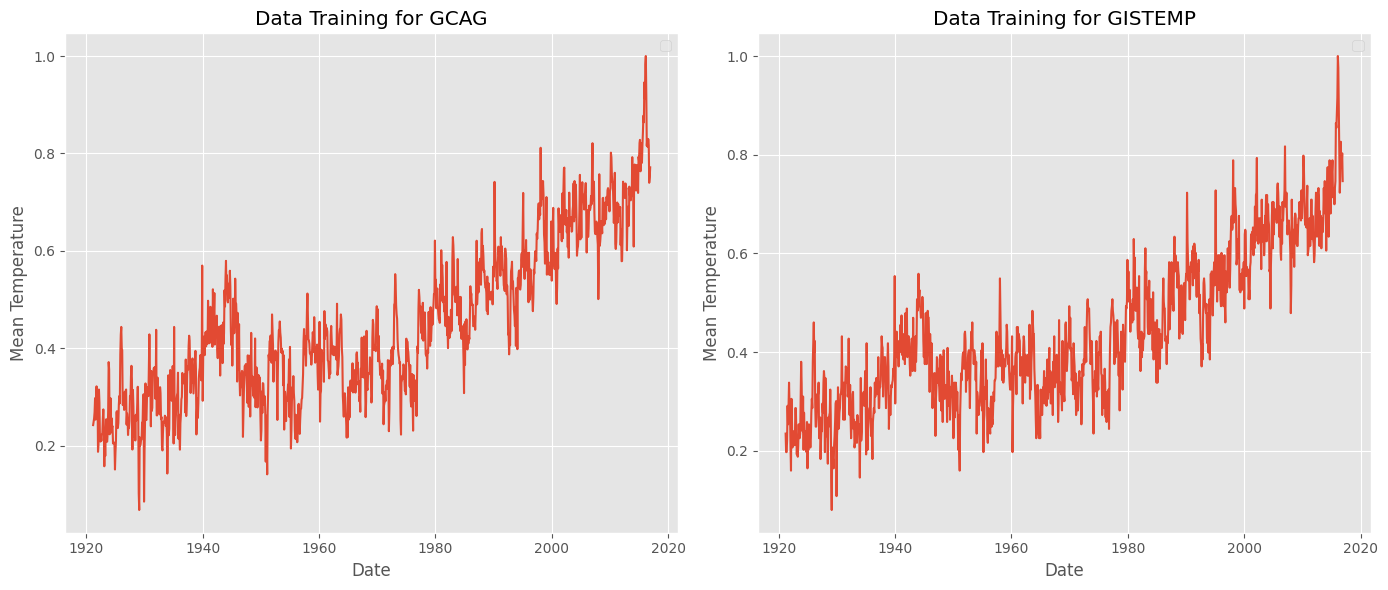

In [28]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(training_set_gcag)
plt.title('Data Training for GCAG')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Plot for GISTEMP
plt.subplot(1, 2, 2)
plt.plot(training_set_gistemp)
plt.title('Data Training for GISTEMP')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('31.pdf',dpi=300)
plt.show()

### Data Validation Graph

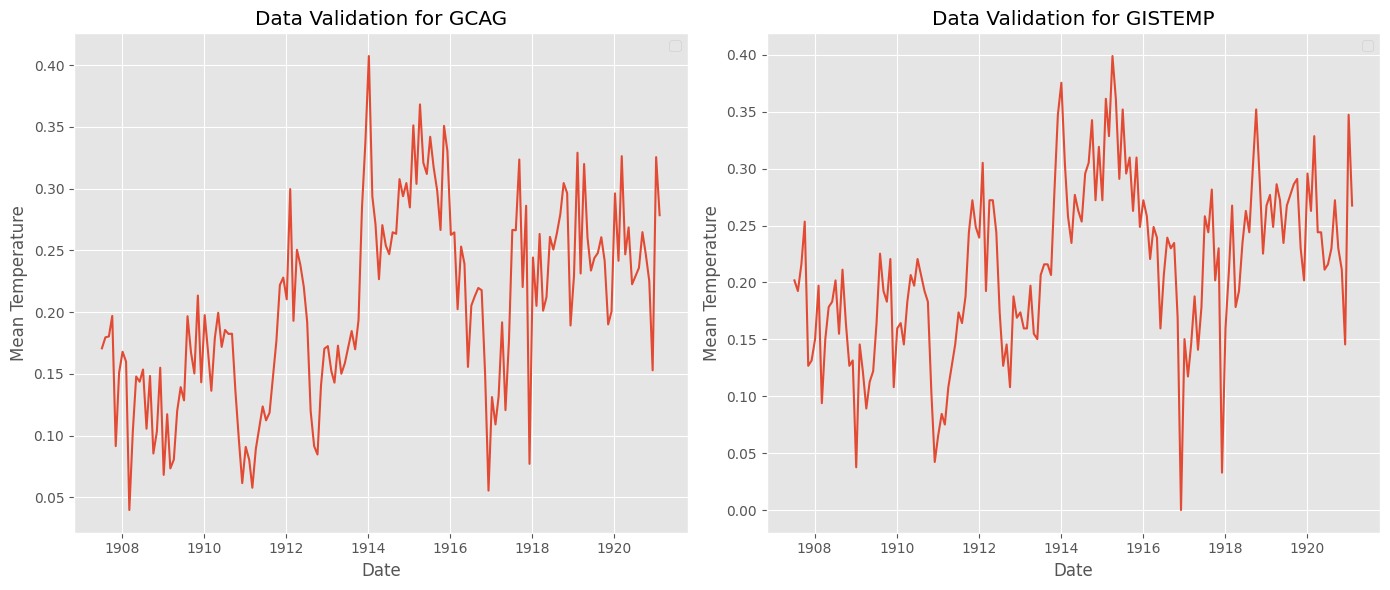

In [29]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(val_set_gcag)
plt.title('Data Validation for GCAG')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Plot for GISTEMP
plt.subplot(1, 2, 2)
plt.plot(val_set_gistemp)
plt.title('Data Validation for GISTEMP')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('32.pdf',dpi=300)
plt.show()

### Data Test Graph

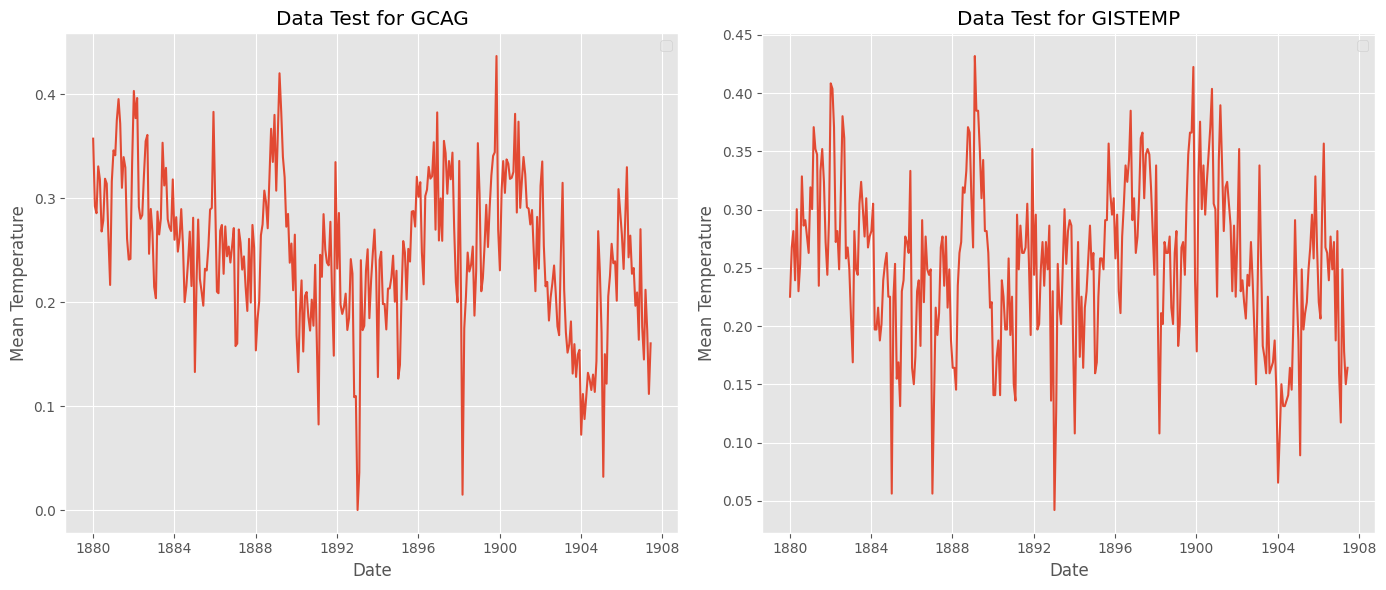

In [30]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(test_set_gcag)
plt.title('Data Test for GCAG')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Plot for GISTEMP
plt.subplot(1, 2, 2)
plt.plot(test_set_gistemp)
plt.title('Data Test for GISTEMP')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('33.pdf',dpi=300)
plt.show()

## Sliding Windows

In [31]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows_gcag(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set_gcag = np.array(training_set_gcag)
array_val_set_gcag = np.array(val_set_gcag)
array_test_set_gcag = np.array(test_set_gcag)

# Create sliding windows into training data
x_train_gcag, y_train_gcag = create_sliding_windows_gcag(array_training_set_gcag,len(array_training_set_gcag), lag)
x_train_gcag = np.reshape(x_train_gcag, (x_train_gcag.shape[0],x_train_gcag.shape[1],1))
# Create sliding windows into validation data
x_val_gcag,y_val_gcag = create_sliding_windows_gcag(array_val_set_gcag,len(array_val_set_gcag),lag)
x_val_gcag = np.reshape(x_val_gcag, (x_val_gcag.shape[0],x_val_gcag.shape[1],1))
# Create sliding windows into test data
x_test_gcag,y_test_gcag = create_sliding_windows_gcag(array_test_set_gcag,len(array_test_set_gcag),lag)
x_test_gcag = np.reshape(x_test_gcag, (x_test_gcag.shape[0],x_test_gcag.shape[1],1))

In [32]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows_gistemp(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set_gistemp = np.array(training_set_gistemp)
array_val_set_gistemp = np.array(val_set_gistemp)
array_test_set_gistemp = np.array(test_set_gistemp)

# Create sliding windows into training data
x_train_gistemp, y_train_gistemp = create_sliding_windows_gistemp(array_training_set_gistemp,len(array_training_set_gistemp), lag)
x_train_gistemp = np.reshape(x_train_gistemp, (x_train_gistemp.shape[0],x_train_gistemp.shape[1],1))
# Create sliding windows into validation data
x_val_gistemp,y_val_gistemp = create_sliding_windows_gistemp(array_val_set_gistemp,len(array_val_set_gistemp),lag)
x_val_gistemp = np.reshape(x_val_gistemp, (x_val_gistemp.shape[0],x_val_gistemp.shape[1],1))
# Create sliding windows into test data
x_test_gistemp,y_test_gistemp = create_sliding_windows_gistemp(array_test_set_gistemp,len(array_test_set_gistemp),lag)
x_test_gistemp = np.reshape(x_test_gistemp, (x_test_gistemp.shape[0],x_test_gistemp.shape[1],1))

# Model GRU and LSTM

In [33]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 128
batch_size = 256
epoch = 50


# Architecture Gated Recurrent Unit
regressorGRU_gcag = Sequential()
# First GRU layer with dropout
regressorGRU_gcag.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train_gcag.shape[1],1), activation = 'selu'))
regressorGRU_gcag.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU_gcag.add(GRU(units=hidden_unit, return_sequences=True, activation = 'selu'))
regressorGRU_gcag.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU_gcag.add(GRU(units=hidden_unit, return_sequences=False, activation = 'selu'))
regressorGRU_gcag.add(Dropout(0.2))

# Output layer
regressorGRU_gcag.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
regressorGRU_gcag.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Fitting ke data training dan data validation
pred_gru_gcag = regressorGRU_gcag.fit(x_train_gcag, y_train_gcag, validation_data=(x_val_gcag,y_val_gcag), batch_size=batch_size, epochs=epoch)

# Architecture combining GRU, and LSTM
regressorLSTM_gcag = Sequential()

# First LSTM layer with dropout
regressorLSTM_gcag.add(LSTM(units=hidden_unit, return_sequences=True, input_shape=(x_train_gcag.shape[1], 1), activation='selu'))
regressorLSTM_gcag.add(Dropout(0.2))
# Second LSTM layer with dropout
regressorLSTM_gcag.add(LSTM(units=hidden_unit, return_sequences=True, activation='selu'))
regressorLSTM_gcag.add(Dropout(0.2))
# Third LSTM layer with dropout
regressorLSTM_gcag.add(LSTM(units=hidden_unit, return_sequences=False, activation='selu'))
regressorLSTM_gcag.add(Dropout(0.2))

# Output layer
regressorLSTM_gcag.add(Dense(units=1))

# Compiling the Long Short-Term Memory (LSTM)
regressorLSTM_gcag.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Fitting LSTM to data training and data validation
pred_lstm_gcag = regressorLSTM_gcag.fit(x_train_gcag, y_train_gcag, validation_data=(x_val_gcag, y_val_gcag), batch_size=batch_size, epochs=epoch)



Epoch 1/50
5/5 [==============================] - 8s 639ms/step - loss: 0.0846 - val_loss: 0.0471
Epoch 2/50
5/5 [==============================] - 1s 107ms/step - loss: 0.0308 - val_loss: 0.0074
Epoch 3/50
5/5 [==============================] - 1s 113ms/step - loss: 0.0157 - val_loss: 0.0028
Epoch 4/50
5/5 [==============================] - 0s 107ms/step - loss: 0.0122 - val_loss: 0.0133
Epoch 5/50
5/5 [==============================] - 0s 81ms/step - loss: 0.0097 - val_loss: 0.0127
Epoch 6/50
5/5 [==============================] - 0s 82ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 7/50
5/5 [==============================] - 0s 71ms/step - loss: 0.0075 - val_loss: 0.0041
Epoch 8/50
5/5 [==============================] - 0s 89ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 9/50
5/5 [==============================] - 0s 72ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 10/50
5/5 [==============================] - 0s 101ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 11/50
5/5 [=======

Epoch 1/50
5/5 [==============================] - 4s 169ms/step - loss: 0.1542 - val_loss: 0.0034
Epoch 2/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0588
Epoch 3/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0222 - val_loss: 0.0097
Epoch 4/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0155 - val_loss: 0.0047
Epoch 5/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0133 - val_loss: 0.0145
Epoch 6/50
5/5 [==============================] - 0s 45ms/step - loss: 0.0094 - val_loss: 0.0195
Epoch 7/50
5/5 [==============================] - 0s 44ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 8/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0073 - val_loss: 0.0056
Epoch 9/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0061 - val_loss: 0.0069
Epoch 10/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 11/50
5/5 [===========

In [34]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 128
batch_size = 256
epoch = 50


# Architecture Gated Recurrent Unit
regressorGRU_gistemp = Sequential()
# First GRU layer with dropout
regressorGRU_gistemp.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train_gistemp.shape[1],1), activation = 'relu'))
regressorGRU_gistemp.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU_gistemp.add(GRU(units=hidden_unit, return_sequences=True, activation = 'relu'))
regressorGRU_gistemp.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU_gistemp.add(GRU(units=hidden_unit, return_sequences=False, activation = 'relu'))
regressorGRU_gistemp.add(Dropout(0.2))

# Output layer
regressorGRU_gistemp.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
regressorGRU_gistemp.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Fitting ke data training dan data validation
pred_gru_gistemp = regressorGRU_gistemp.fit(x_train_gistemp, y_train_gistemp, validation_data=(x_val_gistemp,y_val_gistemp), batch_size=batch_size, epochs=epoch)

# Architecture combining GRU, and LSTM
regressorLSTM_gistemp = Sequential()

# First LSTM layer with dropout
regressorLSTM_gistemp.add(LSTM(units=hidden_unit, return_sequences=True, input_shape=(x_train_gistemp.shape[1], 1), activation='relu'))
regressorLSTM_gistemp.add(Dropout(0.2))
# Second LSTM layer with dropout
regressorLSTM_gistemp.add(LSTM(units=hidden_unit, return_sequences=True, activation='relu'))
regressorLSTM_gistemp.add(Dropout(0.2))
# Third LSTM layer with dropout
regressorLSTM_gistemp.add(LSTM(units=hidden_unit, return_sequences=False, activation='relu'))
regressorLSTM_gistemp.add(Dropout(0.2))

# Output layer
regressorLSTM_gistemp.add(Dense(units=1))

# Compiling the Long Short-Term Memory (LSTM)
regressorLSTM_gistemp.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Fitting LSTM to data training and data validation
pred_lstm_gistemp = regressorLSTM_gistemp.fit(x_train_gistemp, y_train_gistemp, validation_data=(x_val_gistemp, y_val_gistemp), batch_size=batch_size, epochs=epoch)



Epoch 1/50
5/5 [==============================] - 6s 164ms/step - loss: 0.1830 - val_loss: 0.0195
Epoch 2/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0948 - val_loss: 0.0059
Epoch 3/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0224 - val_loss: 0.0758
Epoch 4/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0322 - val_loss: 0.0538
Epoch 5/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0158 - val_loss: 0.0200
Epoch 6/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0168 - val_loss: 0.0148
Epoch 7/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0164 - val_loss: 0.0220
Epoch 8/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0128 - val_loss: 0.0338
Epoch 9/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0133 - val_loss: 0.0325
Epoch 10/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0120 - val_loss: 0.0222
Epoch 11/50
5/5 [===========

Epoch 1/50
5/5 [==============================] - 4s 164ms/step - loss: 0.2059 - val_loss: 0.0410
Epoch 2/50
5/5 [==============================] - 0s 40ms/step - loss: 0.1823 - val_loss: 0.0295
Epoch 3/50
5/5 [==============================] - 0s 43ms/step - loss: 0.1510 - val_loss: 0.0166
Epoch 4/50
5/5 [==============================] - 0s 41ms/step - loss: 0.1092 - val_loss: 0.0058
Epoch 5/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0578 - val_loss: 0.0115
Epoch 6/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0201 - val_loss: 0.0622
Epoch 7/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0270 - val_loss: 0.0698
Epoch 8/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0205 - val_loss: 0.0351
Epoch 9/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0155 - val_loss: 0.0218
Epoch 10/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0174 - val_loss: 0.0225
Epoch 11/50
5/5 [===========

## Graph Training loss & Validation Loss




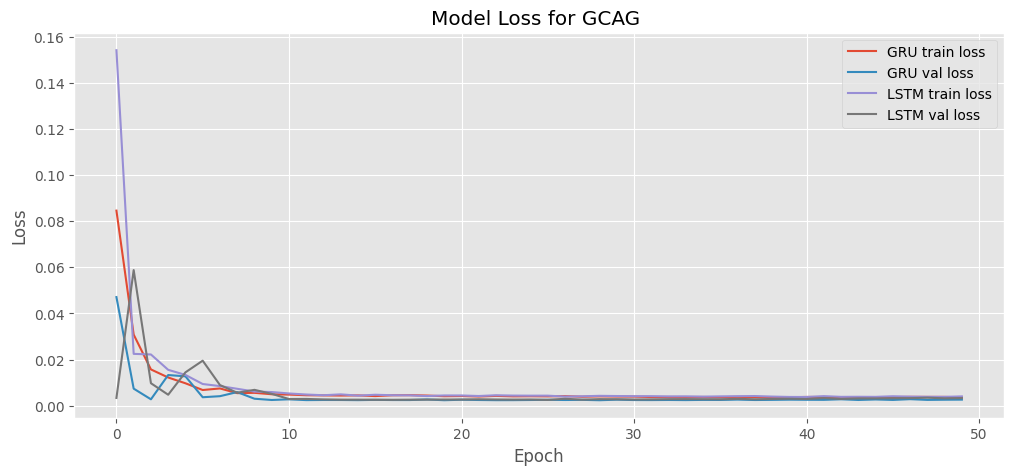

In [35]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(12, 5))
plt.plot(pred_gru_gcag.history['loss'], label='GRU train loss')
plt.plot(pred_gru_gcag.history['val_loss'], label='GRU val loss')
plt.plot(pred_lstm_gcag.history['loss'], label='LSTM train loss')
plt.plot(pred_lstm_gcag.history['val_loss'], label='LSTM val loss')
plt.title('Model Loss for GCAG ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig('relu1.pdf',dpi=300)
plt.show()

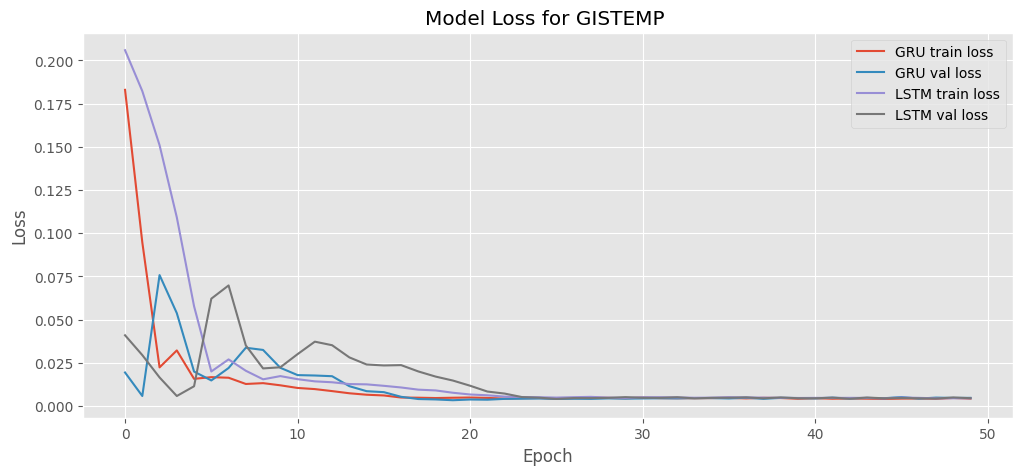

In [36]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(12, 5))
plt.plot(pred_gru_gistemp.history['loss'], label='GRU train loss')
plt.plot(pred_gru_gistemp.history['val_loss'], label='GRU val loss')
plt.plot(pred_lstm_gistemp.history['loss'], label='LSTM train loss')
plt.plot(pred_lstm_gistemp.history['val_loss'], label='LSTM val loss')
plt.title('Model Loss for GISTEMP ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig('relu2.pdf',dpi=300)
plt.show()

## Training Loss & Validation Loss Table

In [37]:
# Tabel value of training loss & validation loss
learningrate_parameter_gcag = learning_rate
train_loss_gcag=pred_lstm_gcag.history['loss'][-1]
validation_loss_gcag=pred_lstm_gcag.history['val_loss'][-1]
train_loss_gcag=pred_gru_gcag.history['loss'][-1]
validation_loss_gcag=pred_gru_gcag.history['val_loss'][-1]
learningrate_parameter_gcag=pd.DataFrame(data=[[learningrate_parameter_gcag, train_loss_gcag, validation_loss_gcag]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter_gcag.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.00364,0.002625


In [38]:
# Tabel value of training loss & validation loss
learningrate_parameter_gistemp = learning_rate
train_loss_gistemp=pred_lstm_gistemp.history['loss'][-1]
validation_loss_gistemp=pred_lstm_gistemp.history['val_loss'][-1]
train_loss_gistemp=pred_gru_gistemp.history['loss'][-1]
validation_loss_gistemp=pred_gru_gistemp.history['val_loss'][-1]
learningrate_parameter_gistemp=pd.DataFrame(data=[[learningrate_parameter_gistemp, train_loss_gistemp, validation_loss_gistemp]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter_gistemp.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.004367,0.004777


## Implementation Model into Data Test

In [39]:
# Implementation model into data test
y_pred_test_gru_gcag = regressorGRU_gcag.predict(x_test_gcag)
y_pred_test_lstm_gcag = regressorLSTM_gcag.predict(x_test_gcag)


# Invert normalization min-max
y_pred_invert_norm_gru_gcag = scaler.inverse_transform(y_pred_test_gru_gcag)
y_pred_invert_norm_lstm_gcag= scaler.inverse_transform(y_pred_test_lstm_gcag)

11/11 [==============================] - 0s 5ms/step


In [40]:
# Implementation model into data test
y_pred_test_gru_gistemp = regressorGRU_gistemp.predict(x_test_gistemp)
y_pred_test_lstm_gistemp = regressorLSTM_gistemp.predict(x_test_gistemp)


# Invert normalization min-max
y_pred_invert_norm_gru_gistemp = scaler.inverse_transform(y_pred_test_gru_gistemp)
y_pred_invert_norm_lstm_gistemp = scaler.inverse_transform(y_pred_test_lstm_gistemp)

11/11 [==============================] - 0s 5ms/step


## Comparison Data Test with Prediction Results

In [41]:
# Comparison data test with data prediction
datacompare_gcag = pd.DataFrame()
datatest_gcag=np.array(dataset_gcag['Mean'][totaldatatrain_gcag+totaldataval_gcag+lag:])
datapredg_gcag= y_pred_invert_norm_gru_gcag
datapredl_gcag= y_pred_invert_norm_lstm_gcag

datacompare_gcag['Data Test'] = datatest_gcag
datacompare_gcag['Prediction Results GRU'] = datapredg_gcag
datacompare_gcag['Prediction Results LSTM'] = datapredl_gcag
datacompare_gcag

,Data Test,Prediction Results GRU,Prediction Results LSTM
0,-0.3508,-0.419032,-0.375041
1,-0.2760,-0.425684,-0.395379
2,-0.4038,-0.339833,-0.323953
3,-0.3443,-0.345254,-0.312000
4,-0.1650,-0.391620,-0.364608
...,...,...,...
323,-0.0738,-0.186522,-0.179603
324,-0.0499,-0.157600,-0.163026
325,-0.1357,-0.092510,-0.093524
326,-0.1229,-0.114731,-0.105513


In [42]:
# Comparison data test with data prediction
datacompare_gistemp = pd.DataFrame()
datatest_gistemp=np.array(dataset_gistemp['Mean'][totaldatatrain_gistemp+totaldataval_gistemp+lag:])
datapredg_gistemp= y_pred_invert_norm_gru_gistemp
datapredl_gistemp= y_pred_invert_norm_lstm_gistemp

datacompare_gistemp['Data Test'] = datatest_gistemp
datacompare_gistemp['Prediction Results GRU'] = datapredg_gistemp
datacompare_gistemp['Prediction Results LSTM'] = datapredl_gistemp
datacompare_gistemp

,Data Test,Prediction Results GRU,Prediction Results LSTM
0,-0.40,-0.296660,-0.306536
1,-0.25,-0.295537,-0.311174
2,-0.53,-0.255649,-0.266861
3,-0.44,-0.255816,-0.241209
4,-0.18,-0.317485,-0.341764
...,...,...,...
323,-0.14,-0.216128,-0.202473
324,-0.27,-0.199190,-0.200167
325,-0.18,-0.174304,-0.148922
326,-0.21,-0.203654,-0.197972


## Calculate accuracy

In [43]:
# Calculate accuracy for GRU
accuracy_gru_gcag = accuracy_score(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_gru_gcag[1:]))
print("Accuracy for GRU: {:.2%}".format(accuracy_gru_gcag))

# Calculate accuracy for LSTM
accuracy_lstm_gcag = accuracy_score(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_lstm_gcag[1:]))
print("Accuracy for LSTM: {:.2%}".format(accuracy_lstm_gcag))

Accuracy for GRU: 93.88%
Accuracy for LSTM: 93.88%


In [44]:
# Calculate accuracy for GRU
accuracy_gru_gistemp = accuracy_score(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_gru_gistemp[1:]))
print("Accuracy for GRU: {:.2%}".format(accuracy_gru_gistemp))

# Calculate accuracy for LSTM
accuracy_lstm_gistemp = accuracy_score(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_lstm_gistemp[1:]))
print("Accuracy for LSTM: {:.2%}".format(accuracy_lstm_gistemp))

Accuracy for GRU: 93.27%
Accuracy for LSTM: 92.66%


## Prediction Results Evaluation

In [45]:

# Predictions for GRU model
y_pred_gru_gcag = regressorGRU_gcag.predict(x_test_gcag)

# Predictions for LSTM model
y_pred_lstm_gcag = regressorLSTM_gcag.predict(x_test_gcag)

# Calculate RMSE for GRU
rmse_gru_gcag = np.sqrt(mean_squared_error(y_test_gcag, y_pred_gru_gcag))
print(f"RMSE for GRU model: {rmse_gru_gcag}")

# Calculate RMSE for LSTM
rmse_lstm_gcag = np.sqrt(mean_squared_error(y_test_gcag, y_pred_lstm_gcag))
print(f"RMSE for LSTM model: {rmse_lstm_gcag}")


11/11 [==============================] - 0s 9ms/step
RMSE for GRU model: 0.055518039543461774
RMSE for LSTM model: 0.057549623545627815


In [46]:

# Predictions for GRU model
y_pred_gru_gistemp = regressorGRU_gistemp.predict(x_test_gistemp)

# Predictions for LSTM model
y_pred_lstm_gistemp = regressorLSTM_gistemp.predict(x_test_gistemp)

# Calculate RMSE for GRU
rmse_gru_gistemp = np.sqrt(mean_squared_error(y_test_gistemp, y_pred_gru_gistemp))
print(f"RMSE for GRU model: {rmse_gru_gistemp}")

# Calculate RMSE for LSTM
rmse_lstm_gistemp = np.sqrt(mean_squared_error(y_test_gistemp, y_pred_lstm_gistemp))
print(f"RMSE for LSTM model: {rmse_lstm_gistemp}")


11/11 [==============================] - 0s 5ms/step
RMSE for GRU model: 0.06136133786879503
RMSE for LSTM model: 0.06340239591636122


## Confusion matrix

Confusion Matrix for GRU:
[[304   5]
 [ 15   3]]
Classification Report for GRU:
              precision    recall  f1-score   support

        -1.0       0.95      0.98      0.97       309
         1.0       0.38      0.17      0.23        18

    accuracy                           0.94       327
   macro avg       0.66      0.58      0.60       327
weighted avg       0.92      0.94      0.93       327

Confusion Matrix for LSTM:
[[304   5]
 [ 15   3]]
Classification Report for LSTM:
              precision    recall  f1-score   support

        -1.0       0.95      0.98      0.97       309
         1.0       0.38      0.17      0.23        18

    accuracy                           0.94       327
   macro avg       0.66      0.58      0.60       327
weighted avg       0.92      0.94      0.93       327



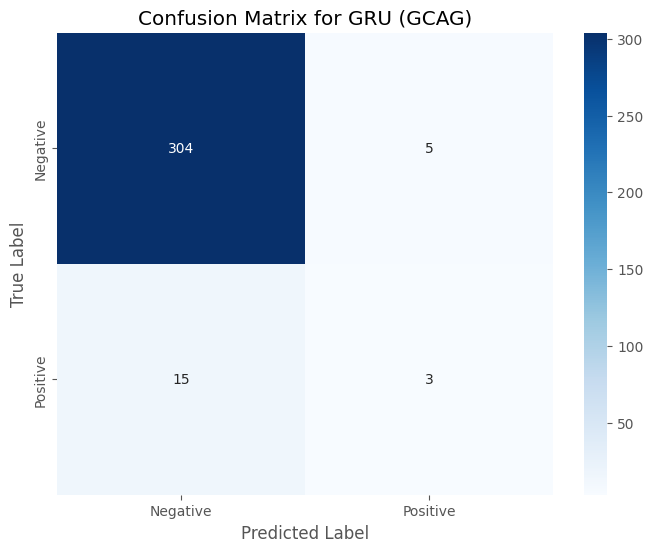

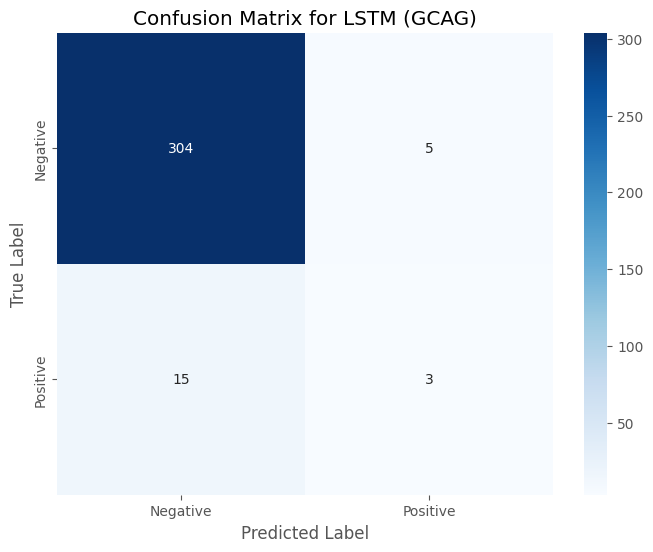

In [47]:
# Confusion matrix for GRU
cm_gru_gcag = confusion_matrix(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_gru_gcag[1:]))
print("Confusion Matrix for GRU:")
print(cm_gru_gcag)

# Classification report for GRU
cr_gru_gcag = classification_report(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_gru_gcag[1:]))
print("Classification Report for GRU:")
print(cr_gru_gcag)

# Confusion matrix for LSTM
cm_lstm_gcag = confusion_matrix(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_lstm_gcag[1:]))
print("Confusion Matrix for LSTM:")
print(cm_lstm_gcag)

# Classification report for LSTM
cr_lstm_gcag = classification_report(np.sign(datatest_gcag[1:]), np.sign(y_pred_invert_norm_lstm_gcag[1:]))
print("Classification Report for LSTM:")
print(cr_lstm_gcag)


# Plotting confusion matrix for GRU
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru_gcag, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for GRU (GCAG)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('relu3.pdf',dpi=300)
plt.show()

# Plotting confusion matrix for LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm_gcag, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for LSTM (GCAG)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('relu4.pdf',dpi=300)
plt.show()

Confusion Matrix for GRU:
[[303   0   5]
 [  3   0   1]
 [ 13   0   2]]
Classification Report for GRU:
              precision    recall  f1-score   support

        -1.0       0.95      0.98      0.97       308
         0.0       0.00      0.00      0.00         4
         1.0       0.25      0.13      0.17        15

    accuracy                           0.93       327
   macro avg       0.40      0.37      0.38       327
weighted avg       0.91      0.93      0.92       327

Confusion Matrix for LSTM:
[[301   0   7]
 [  3   0   1]
 [ 13   0   2]]
Classification Report for LSTM:
              precision    recall  f1-score   support

        -1.0       0.95      0.98      0.96       308
         0.0       0.00      0.00      0.00         4
         1.0       0.20      0.13      0.16        15

    accuracy                           0.93       327
   macro avg       0.38      0.37      0.37       327
weighted avg       0.90      0.93      0.91       327



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

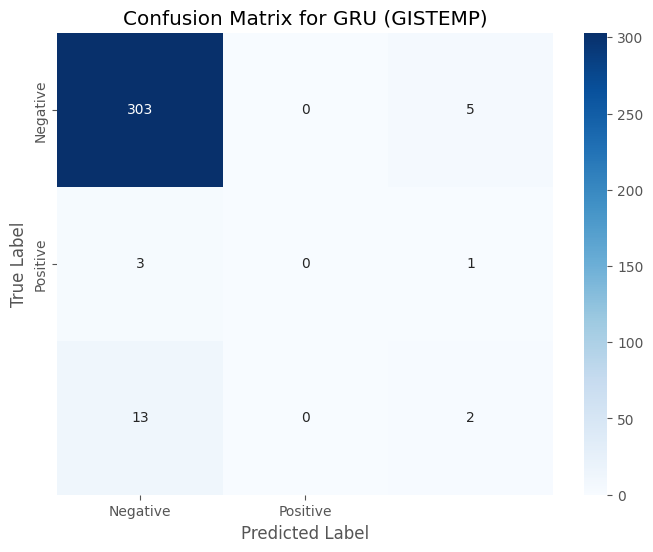

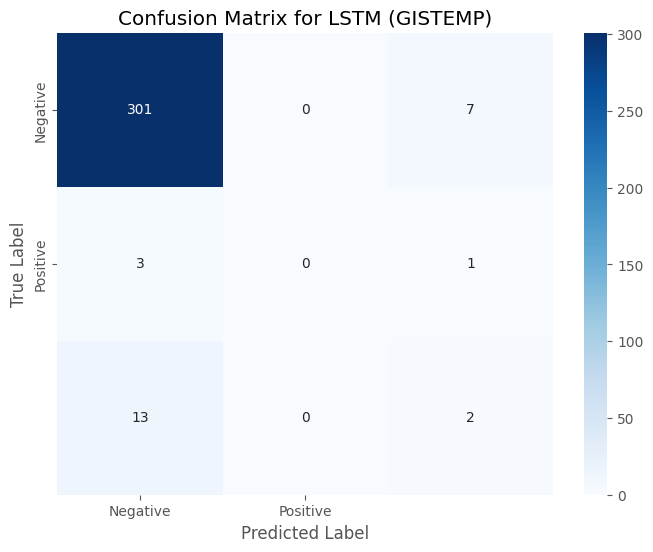

In [48]:
# Confusion matrix for GRU
cm_gru_gistemp = confusion_matrix(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_gru_gistemp[1:]))
print("Confusion Matrix for GRU:")
print(cm_gru_gistemp)

# Classification report for GRU
cr_gru_gistemp = classification_report(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_gru_gistemp[1:]))
print("Classification Report for GRU:")
print(cr_gru_gistemp)

# Confusion matrix for LSTM
cm_lstm_gistemp = confusion_matrix(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_lstm_gistemp[1:]))
print("Confusion Matrix for LSTM:")
print(cm_lstm_gistemp)

# Classification report for LSTM
cr_lstm_gistemp = classification_report(np.sign(datatest_gistemp[1:]), np.sign(y_pred_invert_norm_lstm_gistemp[1:]))
print("Classification Report for LSTM:")
print(cr_lstm_gistemp)


# Plotting confusion matrix for GRU
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru_gistemp, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for GRU (GISTEMP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('relu5.pdf',dpi=300)
plt.show()

# Plotting confusion matrix for LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm_gistemp, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for LSTM (GISTEMP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('relu6.pdf',dpi=300)
plt.show()

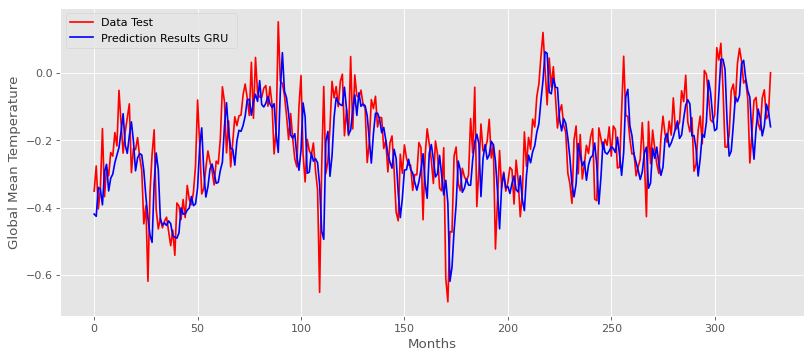

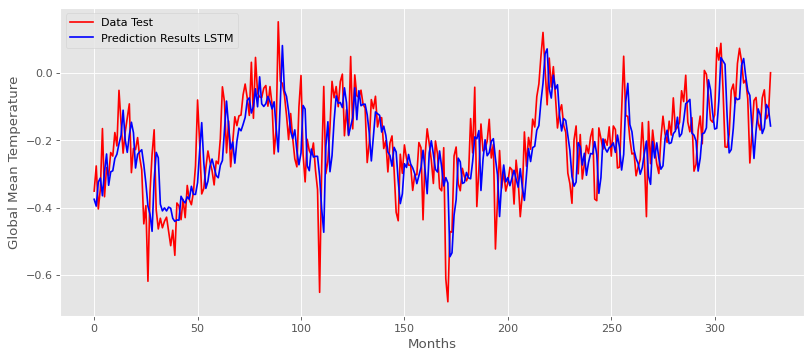

In [49]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(12, 5), dpi=80,facecolor='w', edgecolor='k')
#plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare_gcag['Data Test'], color='red',label='Data Test')
plt.plot(datacompare_gcag['Prediction Results GRU'], color='blue',label='Prediction Results GRU ')
plt.xlabel('Months')
plt.ylabel('Global Mean Temperature')
plt.legend()
plt.savefig('relu7.pdf',dpi=300)
plt.show()

# Create graph data test and prediction result
plt.figure(num=None, figsize=(12, 5), dpi=80,facecolor='w', edgecolor='k')
#plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare_gcag['Data Test'], color='red',label='Data Test')
plt.plot(datacompare_gcag['Prediction Results LSTM'], color='blue',label='Prediction Results LSTM')
plt.xlabel('Months')
plt.ylabel('Global Mean Temperature')
plt.legend()
plt.savefig('relu8.pdf',dpi=300)
plt.show()

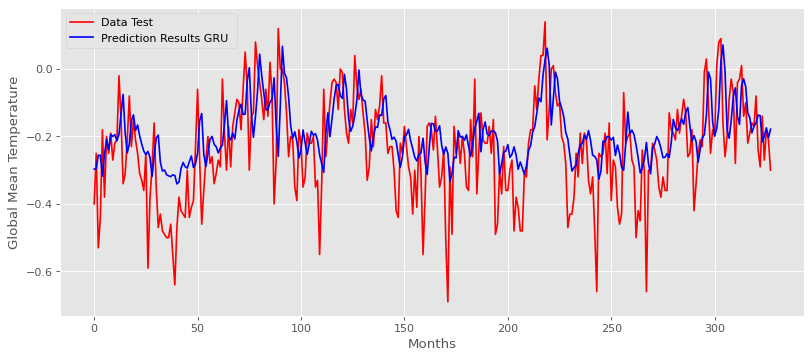

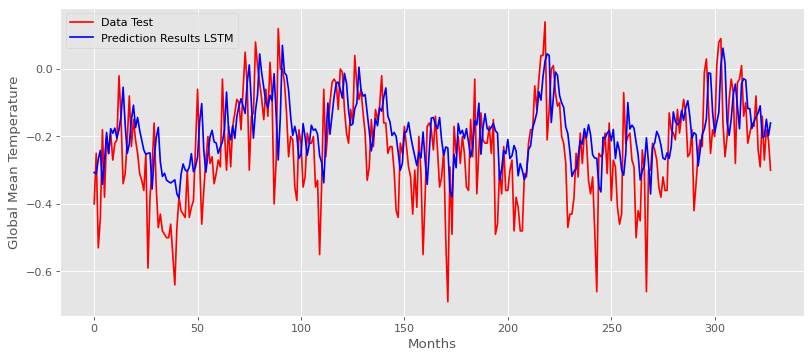

In [50]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(12, 5), dpi=80,facecolor='w', edgecolor='k')
#plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare_gistemp['Data Test'], color='red',label='Data Test')
plt.plot(datacompare_gistemp['Prediction Results GRU'], color='blue',label='Prediction Results GRU ')
plt.xlabel('Months')
plt.ylabel('Global Mean Temperature')
plt.legend()
plt.savefig('relu9.pdf',dpi=300)
plt.show()

# Create graph data test and prediction result
plt.figure(num=None, figsize=(12, 5), dpi=80,facecolor='w', edgecolor='k')
#plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare_gistemp['Data Test'], color='red',label='Data Test')
plt.plot(datacompare_gistemp['Prediction Results LSTM'], color='blue',label='Prediction Results LSTM')
plt.xlabel('Months')
plt.ylabel('Global Mean Temperature')
plt.legend()
plt.savefig('relu10.pdf',dpi=300)
plt.show()